#### Домашнее задание к занятию "Марковские случайные процессы"

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела.  
Постройте матрицу переходных вероятностей.  
Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р;  
Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM

In [2]:
addr = 'C:/Users/gogol/Desktop/Netology/I work in this folder/Блок 4 Машинное обучение/21 Марковские случайные процессы/war_and_peace/'

1.1 Скачиваем текст "Войны и мир" и оставляем только русские буквы и символы пробела

In [3]:
with open(addr + 'tom_1.txt', 'r', encoding='utf-8') as tom1:
    text1 = tom1.read().lower()
with open(addr + 'tom_2.txt', 'r', encoding='utf-8') as tom2:
    text2 = tom2.read().lower()
with open(addr + 'tom_3.txt', 'r', encoding='utf-8') as tom3:
    text3 = tom3.read().lower()
with open(addr + 'tom_4.txt', 'r', encoding='utf-8') as tom4:
    text4 = tom4.read().lower()

text = text1 + ' ' + text2 + ' ' + text3 + ' ' + text4 # объединяем тома
text = re.sub('[\s]',' ', text)                        # заменяем все пробельные символы на обычный пробел
text = re.sub('[^а-я ]','', text)                      # исключаем все символы, кроме кириллических букв и пробелов

In [4]:
text[1003:1206] # смотрим, что тут вообще происходит

'анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия'

1.2 Строим матрицу переходных вероятностей

In [5]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя ' # не забываем про пробел и исключаем букву ё (такой в книге нет)
POS = {l: i for i, l in enumerate(RUSSIAN)}   # создаем словарь вида {'a': 0, 'б': 1, 'в': 2, ... , ' ': 32}

In [6]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN))) # нулевая матрица 33х33

In [7]:
for let1, let2 in zip(text[:-1], text[1:]):
    probabilities[POS[let1], POS[let2]] += 1 # на пересечениях букв (переходах) к значению перехода добавляем +1

In [8]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None]) # делим каждое знач. в строке матрицы на сумму всей строки

In [9]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

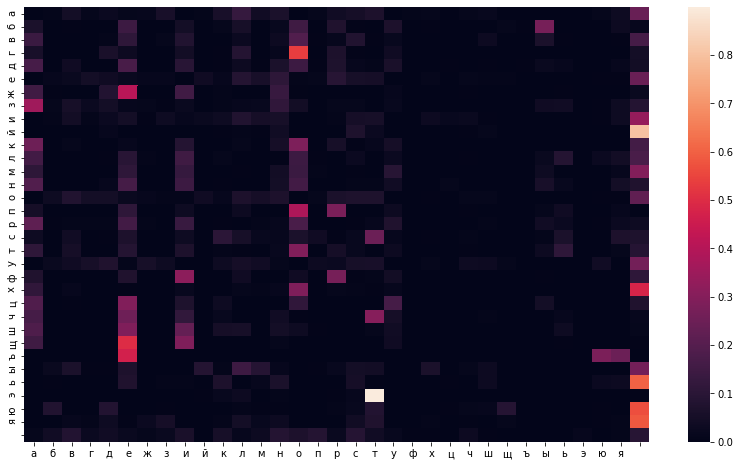

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

1.3 Считаем вероятность встретить строку из 4-х символов, которая начинается на П, а кончается на Р

In [11]:
start = POS['п']
end = POS['р']
sum_proba = 0
prior = 1. / len(RUSSIAN) # задаем начальную вероятность встретить любую букву алфавита (1/33)

for second in RUSSIAN:
    for third in RUSSIAN:
        proba = prior * probabilities[start, POS[second]] * probabilities[POS[second], POS[third]] * probabilities[POS[third], end]
        if proba > 0:
#             print(''.join(['п', second, third, 'р']), proba) # тут можно посмотреть на вероятность каждой строки
            sum_proba += proba
    
print('Общая вероятность встретить строку из 4-х символов, которая начинается на П, а кончается на Р:', sum_proba)

Общая вероятность встретить строку из 4-х символов, которая начинается на П, а кончается на Р: 0.0009676916660806726


1.4 Используя матрицу переходных вероятностей сгенерируем слово, начинающееся с буквы Б и имеющее длину 8 символов

In [18]:
word = []
start = 'б'
word.append(start)
length = 8

for i in range(length):
    index = POS[word[i]] # здесь определяем индекс текущей буквы (для i=0: POS[word[0]] --> POS['б'] --> 1)
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index]) # choice([а,б,в,...], [0.07,0.0006,0.005,...]) учитывает матрицу переходных состояний для текущей буквы и выдает следующую букву не случайно, а учитывая ее реальную вероятность появления после текущей (поэтому мы генерируем слова по крайней мере похожие на настоящие, а не полную белиберду)
    while next_char == ' ': # здесь мы исключаем наличие пробела в слове
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    word.append(next_char)

print (''.join(word))

ботволовы


2.1 Оцениваем ряд через HMM

In [13]:
# P.S. ссылка в задании перенаправляет на https://www.qlik.com/, где нет рядов для скачивания,
# поэтому в работе использован ряд из предыдущих занятий

In [14]:
series = pd.read_csv("C:/Users/gogol/Desktop/Netology/I work in this folder/Блок 4 Машинное обучение/17 Знакомство с временными рядами/Series/weekly-closings-of-the-dowjones-.csv")['Close']

In [15]:
values = series.values.reshape(-1,1)

In [16]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620569
3 -786.8375332667733
4 -752.0201472668961
5 -737.1181111930912
6 -729.5671112589438
7 -713.7233991716986
8 -702.1075404014942
9 -690.9838068209625
10 -682.1267008564821


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


11 -678.9259827228622
12 -674.6658425183452
13 -663.0816538384943


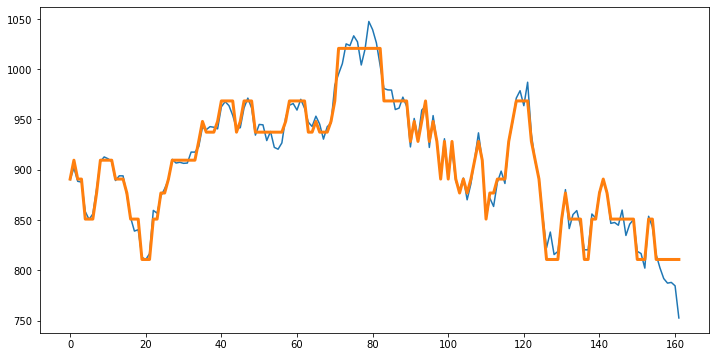

In [17]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)